In [1532]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1533]:
df = pd.read_csv(r'C:/Users/Admin/Desktop/hotel_bookings.csv')

In [1534]:
df.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015


# data cleaning

In [1535]:
df.shape

(119390, 32)

In [1536]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [1537]:
df.drop(['agent','company'],axis = 1,inplace =True )

In [1538]:
df['country'].value_counts().index[0]

'PRT'

In [1539]:
df['country'].fillna(df['country'].value_counts().index[0],inplace = True)

In [1540]:
df.fillna(0,inplace = True)

In [1541]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [1542]:
filter1 = (df['children']==0) & (df['adults'] ==0) & (df['babies'] ==0)

In [1543]:
df[filter1]


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,I,1,No Deposit,0,Transient-Party,0.00,0,0,Check-Out,10/6/2015
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,I,0,No Deposit,0,Transient,0.00,0,0,Check-Out,10/12/2015
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,C,0,No Deposit,0,Transient-Party,0.00,0,0,Check-Out,11/23/2015
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,A,1,No Deposit,122,Transient-Party,0.00,0,0,Check-Out,1/4/2016
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,C,1,No Deposit,122,Transient-Party,0.00,0,0,Check-Out,1/5/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,A,1,No Deposit,0,Transient,100.80,0,0,Check-Out,6/30/2017
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,K,0,No Deposit,0,Transient,0.00,1,1,Check-Out,7/1/2017
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,K,2,No Deposit,0,Transient,73.80,0,0,Check-Out,7/17/2017
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,K,1,No Deposit,0,Transient-Party,22.86,0,1,Check-Out,7/22/2017


In [1544]:
data = (df[~filter1])
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,9/7/2017


# analysing demand of hotels

In [1545]:
data.shape

(119210, 30)

In [1546]:
data['is_canceled'].unique()

array([0, 1], dtype=int64)

In [1547]:
data[data['is_canceled'] == 0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,9/7/2017


In [1548]:
data[data['is_canceled']==0]['country'].value_counts()

country
PRT    21398
GBR     9668
FRA     8468
ESP     6383
DEU     6067
       ...  
BHR        1
DJI        1
MLI        1
NPL        1
FRO        1
Name: count, Length: 165, dtype: int64

In [1549]:
len(data[data['is_canceled'] ==0])

75011

In [1550]:
data[data['is_canceled']==0]['country'].value_counts()/75011

country
PRT    0.285265
GBR    0.128888
FRA    0.112890
ESP    0.085094
DEU    0.080881
         ...   
BHR    0.000013
DJI    0.000013
MLI    0.000013
NPL    0.000013
FRO    0.000013
Name: count, Length: 165, dtype: float64

In [1551]:
country_wise_data = data[data['is_canceled'] ==0]['country'].value_counts().reset_index()
country_wise_data.columns=['country','guest_arrival']
country_wise_data

,country,guest_arrival
0,PRT,21398
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
...,...,...
160,BHR,1
161,DJI,1
162,MLI,1
163,NPL,1


In [1552]:
!pip install plotly

In [1553]:
! pip install chart_studio

In [1554]:
import plotly
import chart_studio.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode ,plot,iplot
init_notebook_mode(connected =True)

In [1555]:
import plotly.express as px


In [1556]:
map_guest=px.choropleth(country_wise_data,
              locations=country_wise_data['country'],
              color=country_wise_data['guest_arrival'],
              hover_name=country_wise_data['country'],
              title='home country of guests')

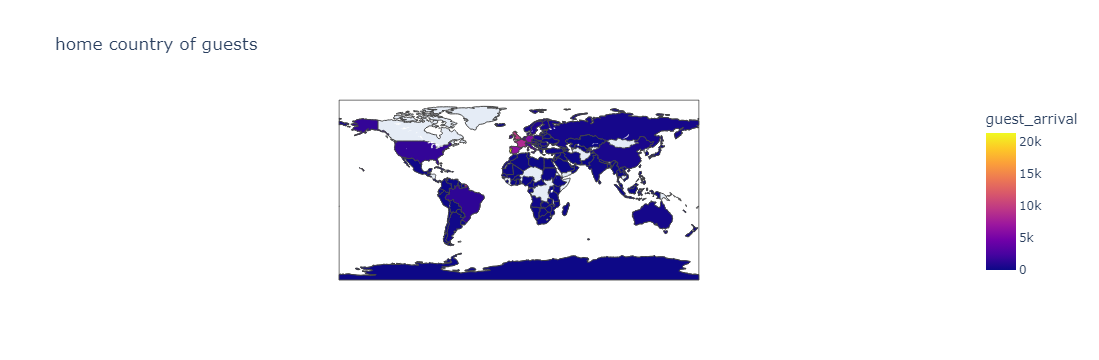

In [1557]:
map_guest.show()                                                               

# analysing price of hotels across year

In [1558]:
data2 = data[data['is_canceled']==0]

In [1559]:
data2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

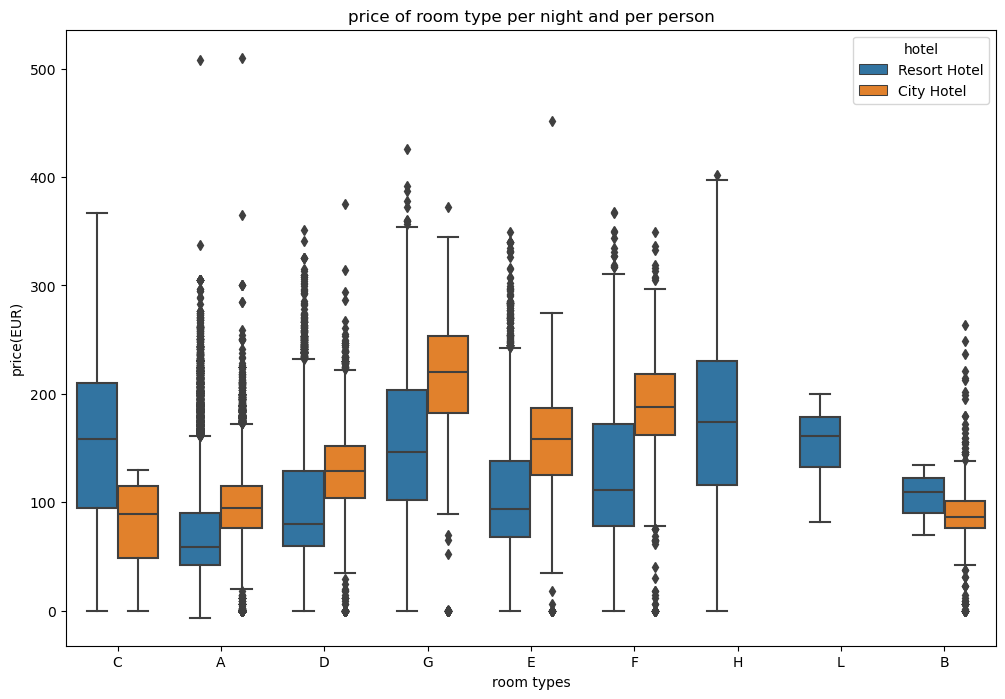

In [1560]:
plt.figure(figsize = (12,8))
sns.boxplot(x = 'reserved_room_type', y = 'adr', hue = 'hotel', data = data2)
plt.title('price of room type per night and per person')
plt.xlabel('room types')
plt.ylabel('price(EUR)')
plt.show()

# which are the most busy hotel?

In [1561]:
data['hotel'].unique() 

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [1562]:
data_resort=data[(data['hotel']  =='Resort Hotel') & (data['is_canceled']== 0)]
data_city = data[(data['hotel'] =='City Hotel') & (data['is_canceled']==0)]


In [1563]:
data_resort.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,7/2/2015


In [1564]:
 rush_resort =data_resort['arrival_date_month'].value_counts().reset_index()
rush_resort.columns = ['month', 'no_of_guests']
rush_resort

,month,no_of_guests
0,August,3257
1,July,3137
2,October,2575
3,March,2571
4,April,2550
5,May,2535
6,February,2308
7,September,2102
8,June,2037
9,December,2014


In [1565]:
 rush_city =data_city['arrival_date_month'].value_counts().reset_index()
rush_city.columns = ['month', 'no_of_guests']
rush_city

,month,no_of_guests
0,August,5367
1,July,4770
2,May,4568
3,June,4358
4,October,4326
5,September,4283
6,March,4049
7,April,4010
8,February,3051
9,November,2676


In [1566]:
final_rush = rush_resort.merge (rush_city, on ='month')
final_rush.columns = ['month', 'guest_in_resort','guest_in_city']

In [1567]:
final_rush

,month,guest_in_resort,guest_in_city
0,August,3257,5367
1,July,3137,4770
2,October,2575,4326
3,March,2571,4049
4,April,2550,4010
5,May,2535,4568
6,February,2308,3051
7,September,2102,4283
8,June,2037,4358
9,December,2014,2377


In [1568]:
! pip install sorted.months.weekdays
! pip install sort_dataframeby_monthorweek

In [1569]:
import sort_dataframeby_monthorweek as sd

In [1570]:
final_rush = sd.Sort_Dataframeby_Month(final_rush ,'month')

In [1571]:
final_rush.columns

Index(['month', 'guest_in_resort', 'guest_in_city'], dtype='object')

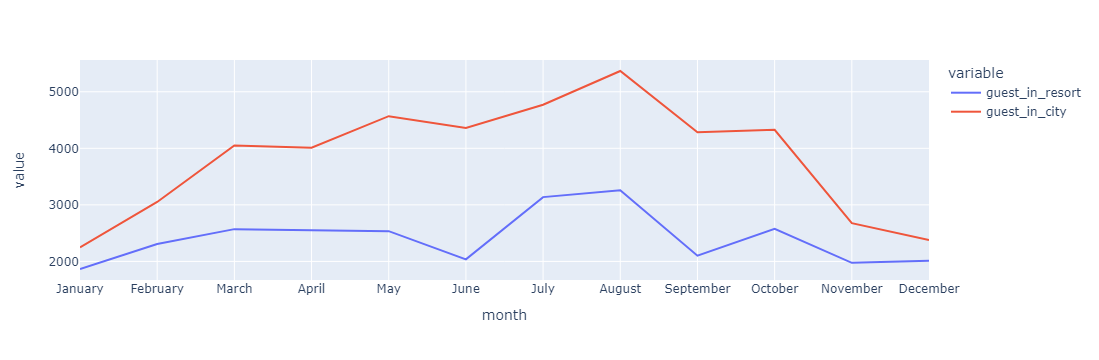

In [1572]:
px.line(data_frame = final_rush,x = 'month',y = ['guest_in_resort','guest_in_city'])

# which month has highest adr for cancell non cancell booking

In [1573]:
data = sd.Sort_Dataframeby_Month(data,'arrival_date_month')

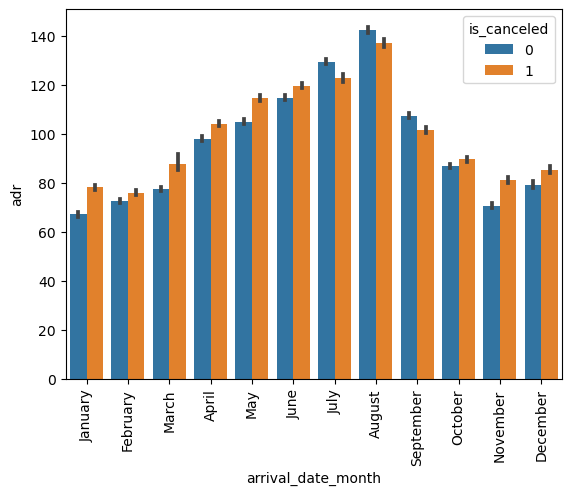

In [1574]:
data['is_canceled'] = data['is_canceled'].astype(str)
sns.barplot(x='arrival_date_month', y='adr', data=data, hue='is_canceled')
plt.xticks(rotation='vertical')
plt.show()


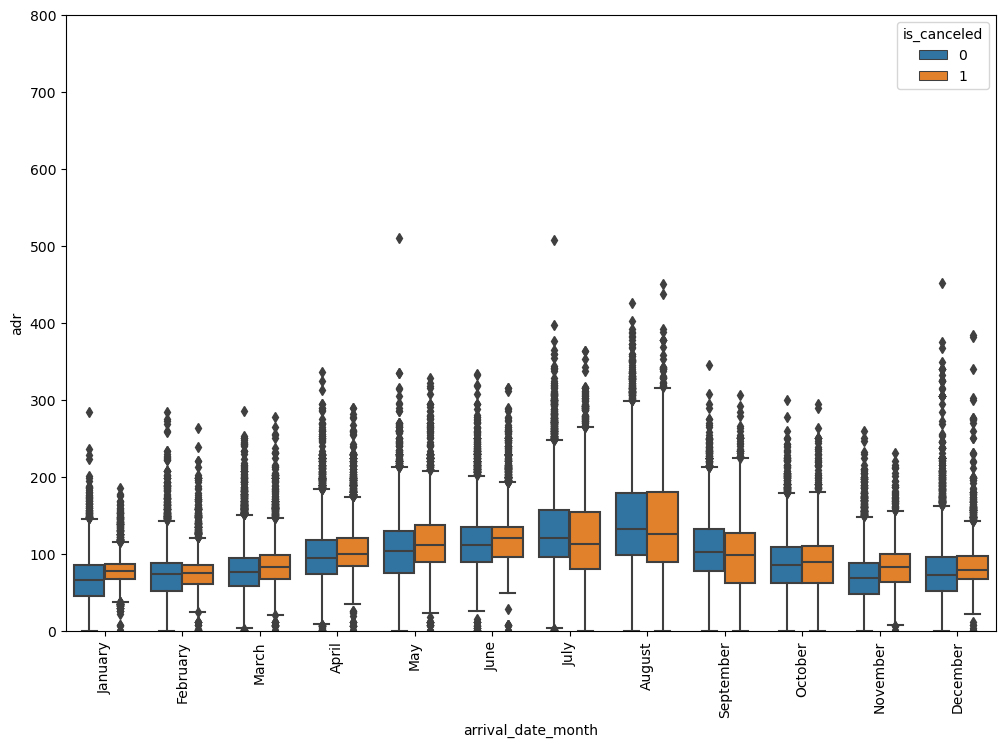

In [1575]:
plt.figure(figsize = (12,8))
sns.boxplot(x='arrival_date_month', y ='adr', data = data ,hue ='is_canceled', )
plt.xticks(rotation ='vertical')
plt.ylim(0,800)
plt.show()


# lets analysis bookings were made only for  weekdays or for weekends or for both

In [1576]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [1577]:
pd.crosstab( index = data['stays_in_weekend_nights'], columns =data['stays_in_week_nights'])

stays_in_week_nights,0,1,2,3,4,5,6,7,8,9,...,24,25,26,30,32,33,34,40,42,50
stays_in_weekend_nights,,,,,,,,,,,,,,,,,,,,,
0,645,16436,17949,11557,4478,830,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4569,7325,8976,6150,2407,1188,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2358,6531,6745,4534,2658,8648,847,446,391,81,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,308,300,397,131,61,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,94,347,181,132,86,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1578]:
def week_function(row):
    feature1 = 'stays_in_weekend_nights'
    feature2 = 'stays_in_week_nights'
    if row[feature2] ==0 and row[feature1] >0:
        return 'stay_just_weekend'
    elif row[feature2] >0 and row[feature1] ==0:
         return 'stay_just_week_days'
    elif row[feature2] >0 and row[feature1] >0:
        return 'stay_both_week_days_weekend'
    else:
        return 'undefined_data'
         
        
 

In [1579]:
data2['weekend_or_weekday']=data2.apply(week_function,axis = 1)

In [1580]:
data2.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,weekend_or_weekday
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015,undefined_data
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015,undefined_data


In [1581]:
data2['weekend_or_weekday'].value_counts()

weekend_or_weekday
stay_both_week_days_weekend    37551
stay_just_week_days            31788
stay_just_weekend               5050
undefined_data                   622
Name: count, dtype: int64

In [1582]:
data2 = sd.Sort_Dataframeby_Month(data2,'arrival_date_month')


In [1583]:
group_data = data2.groupby(['arrival_date_month','weekend_or_weekday']).size().unstack().reset_index()

In [1584]:
sorted_data=sd.Sort_Dataframeby_Month(group_data,'arrival_date_month')

In [1585]:
sorted_data.set_index('arrival_date_month', inplace = True)       

In [1586]:
sorted_data

,stay_both_week_days_weekend,stay_just_week_days,stay_just_weekend,undefined_data
arrival_date_month,,,,
January,1550,2125,393,47
February,2438,2514,360,47
March,3151,3060,359,50
April,3627,2559,344,30
May,3442,3017,570,74
June,3241,2685,433,36
July,4570,2818,462,57
August,4929,3137,509,49
September,3192,2692,479,22


<Axes: xlabel='arrival_date_month'>

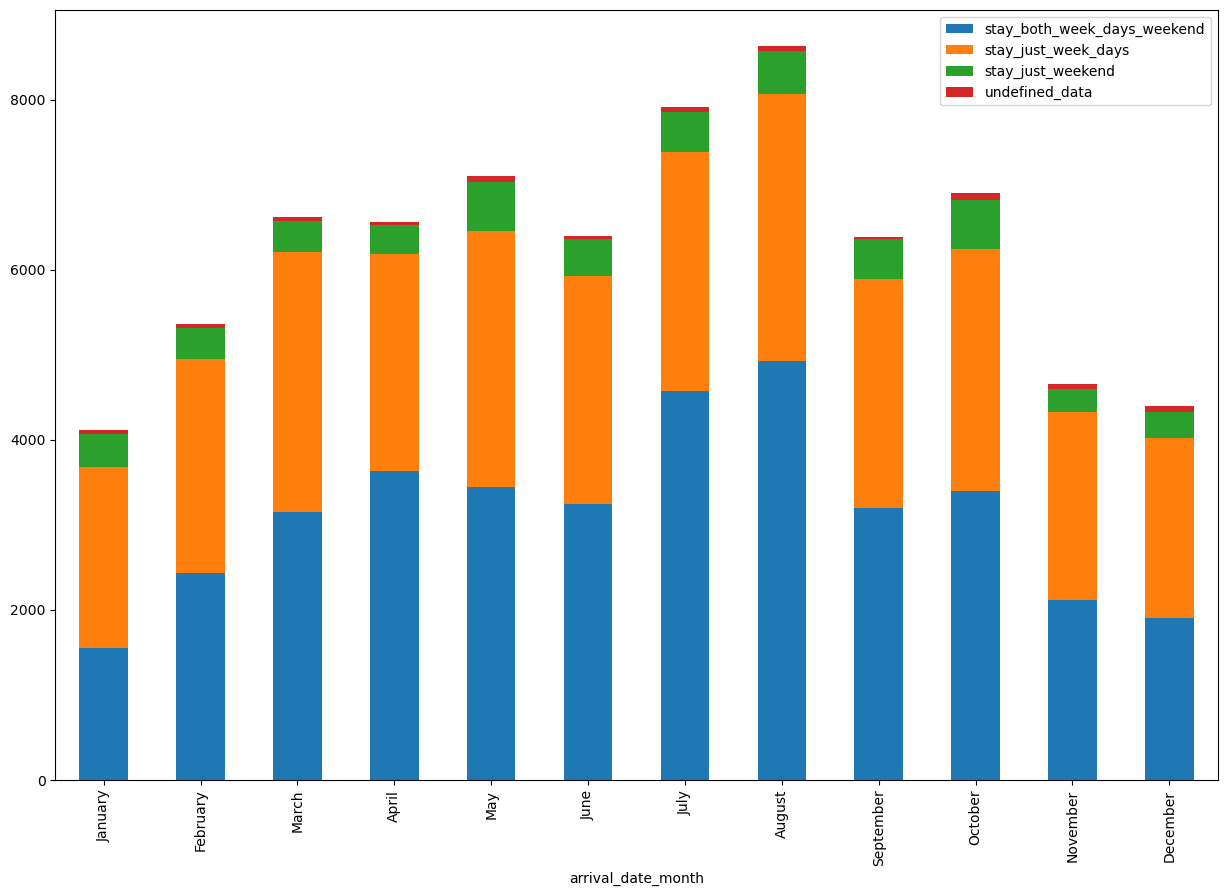

In [1587]:
sorted_data.plot(kind = 'bar', stacked = True, figsize = (15,10))

# how to create some more feature

In [1588]:
data2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'weekend_or_weekday'],
      dtype='object')

In [1589]:
def family(row):
    if (row['adults']>0) &( row['children']>0 or (row['babies']>0) ):
        return 1
    else:
        return 0

In [1590]:
data['is_family']= data.apply(family,axis = 1)

In [1591]:

data['total_customer'] = data['adults']+data['children']+data['babies']

In [1592]:
data['total_nights'] = data['stays_in_weekend_nights']+data['stays_in_weekend_nights']

In [1593]:
data.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,is_family,total_customer,total_nights
0,Resort Hotel,0,109,2016,January,1,1,0,1,2,...,0,Transient-Party,59.94,0,1,Check-Out,1/2/2016,0,2.0,0
1,Resort Hotel,0,109,2016,January,1,1,0,1,2,...,0,Transient-Party,116.10,1,1,Check-Out,1/2/2016,1,4.0,0


In [1594]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'is_family',
       'total_customer', 'total_nights'],
      dtype='object')

In [1595]:
data['deposit_type'].unique()

array(['No Deposit', 'Non Refund', 'Refundable'], dtype=object)

In [1596]:
dict1 ={'No Deposit':0, 'Non Refund':1, 'Refundable':0}

In [1597]:
data['deposit_type'].map(dict1)

0         0
1         0
2         0
3         0
4         0
         ..
119205    0
119206    0
119207    0
119208    0
119209    0
Name: deposit_type, Length: 119210, dtype: int64

In [1598]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'is_family',
       'total_customer', 'total_nights'],
      dtype='object')

In [1599]:
data.drop(columns = ['adults', 'children', 'babies','deposit_type'],axis = 1, inplace = True)

In [1600]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'days_in_waiting_list',
       'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status',
       'reservation_status_date', 'is_family', 'total_customer',
       'total_nights'],
      dtype='object')

In [1601]:
data.head(6)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,meal,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,is_family,total_customer,total_nights
0,Resort Hotel,0,109,2016,January,1,1,0,1,BB,...,0,Transient-Party,59.94,0,1,Check-Out,1/2/2016,0,2.0,0
1,Resort Hotel,0,109,2016,January,1,1,0,1,BB,...,0,Transient-Party,116.10,1,1,Check-Out,1/2/2016,1,4.0,0
2,Resort Hotel,1,2,2016,January,1,1,0,1,BB,...,0,Transient,89.00,0,1,No-Show,1/1/2016,0,2.0,0
3,Resort Hotel,0,88,2016,January,1,1,0,2,HB,...,0,Transient,73.46,0,2,Check-Out,1/3/2016,0,2.0,0
4,Resort Hotel,1,20,2016,January,1,1,0,2,BB,...,0,Transient,119.00,0,0,Canceled,12/22/2015,1,4.0,0
5,Resort Hotel,1,76,2016,January,1,1,1,2,BB,...,0,Transient,57.90,0,1,Canceled,12/20/2015,0,2.0,2


# feature encoding on data

In [1602]:

data.dtypes

hotel                              object
is_canceled                        object
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
days_in_waiting_list                int64
customer_type                      object
adr                               float64
required_car_parking_spaces         int64
total_of_special_requests         

In [1603]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'days_in_waiting_list',
       'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status',
       'reservation_status_date', 'is_family', 'total_customer',
       'total_nights'],
      dtype='object')

In [1604]:
data['is_canceled'] = pd.to_numeric(data['is_canceled'], errors='coerce')

In [1605]:
cate_features = [col for col in  data.columns if data[col].dtype =='object']

In [1606]:
cate_features

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

In [1607]:
data_cate=data[cate_features]

In [1608]:
num_features = [col for col in  data.columns if data[col].dtype !='object']


In [1609]:

num_features


['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'is_family',
 'total_customer',
 'total_nights']

In [1610]:
data.groupby(['hotel'])['is_canceled'].mean().to_dict()


{'City Hotel': 0.4178593534858457, 'Resort Hotel': 0.27767373336329815}

In [1611]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [1612]:
data_cate['cancellation'] = data['is_canceled']

In [1613]:
data_cate

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date,cancellation
0,Resort Hotel,January,BB,RUS,Online TA,TA/TO,A,D,Transient-Party,Check-Out,1/2/2016,0
1,Resort Hotel,January,BB,RUS,Online TA,TA/TO,H,H,Transient-Party,Check-Out,1/2/2016,0
2,Resort Hotel,January,BB,PRT,Online TA,TA/TO,D,D,Transient,No-Show,1/1/2016,1
3,Resort Hotel,January,HB,ARG,Online TA,TA/TO,A,D,Transient,Check-Out,1/3/2016,0
4,Resort Hotel,January,BB,PRT,Online TA,TA/TO,G,G,Transient,Canceled,12/22/2015,1
...,...,...,...,...,...,...,...,...,...,...,...,...
119205,City Hotel,December,BB,BRA,Direct,Direct,E,F,Transient,Check-Out,1/6/2017,0
119206,City Hotel,December,SC,FRA,Online TA,TA/TO,A,A,Transient,Check-Out,1/6/2017,0
119207,City Hotel,December,BB,FRA,Offline TA/TO,TA/TO,A,B,Transient,Check-Out,1/7/2017,0
119208,City Hotel,December,SC,DEU,Online TA,TA/TO,A,A,Transient-Party,Check-Out,1/8/2017,0


In [1614]:
cols = data_cate.columns

In [1615]:
cols

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'customer_type', 'reservation_status', 'reservation_status_date',
       'cancellation'],
      dtype='object')

In [1616]:
cols = cols[0:-1]

In [1617]:
cols

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'customer_type', 'reservation_status', 'reservation_status_date'],
      dtype='object')

In [1618]:
for col in cols:
    dict2 =data_cate.groupby([col])['cancellation'].mean().to_dict()
    data_cate[col]=data_cate[col].map(dict2)
    

In [1619]:
#It iterates over each column col in the list cols.
#For each column, it calculates the mean of the 'cancellation' column after grouping by the values in the current column col.
#It converts this mean into a dictionary where keys are the unique values in the current column col and values are the corresponding means of 'cancellation'.
#Finally, it maps these mean values back to the original DataFrame data_cate using map() function, so that each value in the column col is replaced by its corresponding mean cancellation value.



In [1620]:
data_cate.head(3)

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date,cancellation
0,0.277674,0.305016,0.374106,0.379365,0.36759,0.410598,0.391567,0.251373,0.254504,0.0,0.048276,0
1,0.277674,0.305016,0.374106,0.379365,0.36759,0.410598,0.407654,0.352528,0.254504,0.0,0.048276,0
2,0.277674,0.305016,0.374106,0.562958,0.36759,0.410598,0.318108,0.251373,0.407864,1.0,0.101010,1


In [1621]:
 dataframe =pd.concat([data_cate, data[num_features]], axis = 1)

In [1622]:
dataframe

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,...,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer,total_nights
0,0.277674,0.305016,0.374106,0.379365,0.367590,0.410598,0.391567,0.251373,0.254504,0.0,...,0,0,0,0,59.94,0,1,0,2.0,0
1,0.277674,0.305016,0.374106,0.379365,0.367590,0.410598,0.407654,0.352528,0.254504,0.0,...,0,0,0,0,116.10,1,1,1,4.0,0
2,0.277674,0.305016,0.374106,0.562958,0.367590,0.410598,0.318108,0.251373,0.407864,1.0,...,0,0,0,0,89.00,0,1,0,2.0,0
3,0.277674,0.305016,0.344653,0.252336,0.367590,0.410598,0.391567,0.251373,0.407864,0.0,...,0,0,0,0,73.46,0,2,0,2.0,0
4,0.277674,0.305016,0.374106,0.562958,0.367590,0.410598,0.364723,0.306002,0.407864,1.0,...,0,0,0,0,119.00,0,0,1,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119205,0.417859,0.350348,0.374106,0.373537,0.153712,0.174868,0.292683,0.247134,0.407864,0.0,...,0,0,4,0,117.82,0,1,1,3.0,6
119206,0.417859,0.350348,0.374064,0.185848,0.367590,0.410598,0.391567,0.445055,0.407864,0.0,...,0,0,0,0,90.34,0,1,0,2.0,4
119207,0.417859,0.350348,0.374106,0.185848,0.343313,0.410598,0.391567,0.237233,0.407864,0.0,...,0,0,0,0,103.57,0,0,0,2.0,4
119208,0.417859,0.350348,0.374064,0.167193,0.367590,0.410598,0.391567,0.445055,0.254504,0.0,...,0,0,2,0,68.57,0,2,0,2.0,4


In [1623]:
dataframe.columns

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'customer_type', 'reservation_status', 'reservation_status_date',
       'cancellation', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'days_in_waiting_list', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests', 'is_family',
       'total_customer', 'total_nights'],
      dtype='object')

In [1624]:
dataframe.drop(['cancellation'], axis = 1, inplace = True)

In [1625]:
dataframe.head(3)

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,...,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer,total_nights
0,0.277674,0.305016,0.374106,0.379365,0.36759,0.410598,0.391567,0.251373,0.254504,0.0,...,0,0,0,0,59.94,0,1,0,2.0,0
1,0.277674,0.305016,0.374106,0.379365,0.36759,0.410598,0.407654,0.352528,0.254504,0.0,...,0,0,0,0,116.10,1,1,1,4.0,0
2,0.277674,0.305016,0.374106,0.562958,0.36759,0.410598,0.318108,0.251373,0.407864,1.0,...,0,0,0,0,89.00,0,1,0,2.0,0


# 
handle outlier

<Axes: xlabel='lead_time', ylabel='Density'>

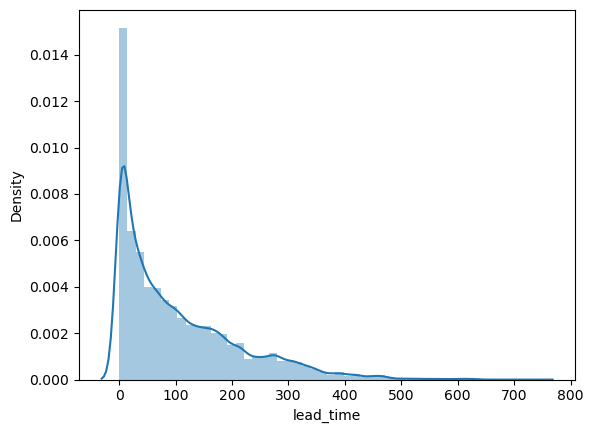

In [1626]:
sns.distplot(dataframe['lead_time'])

In [1627]:
def handle_outlier(col):
 dataframe[col] = np.log1p(dataframe[col])

In [1628]:
handle_outlier('lead_time')

<Axes: xlabel='lead_time', ylabel='Density'>

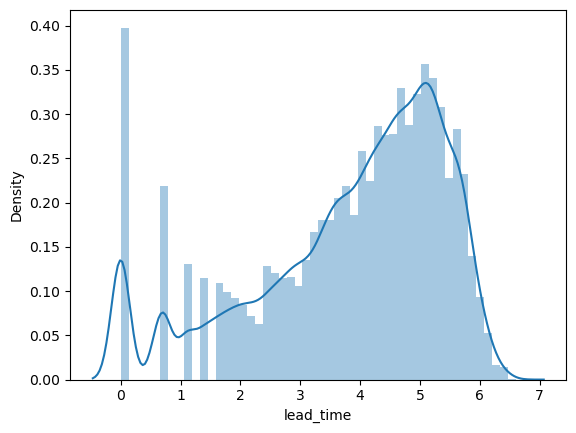

In [1629]:
sns.distplot(dataframe['lead_time'])

<Axes: xlabel='adr', ylabel='Density'>

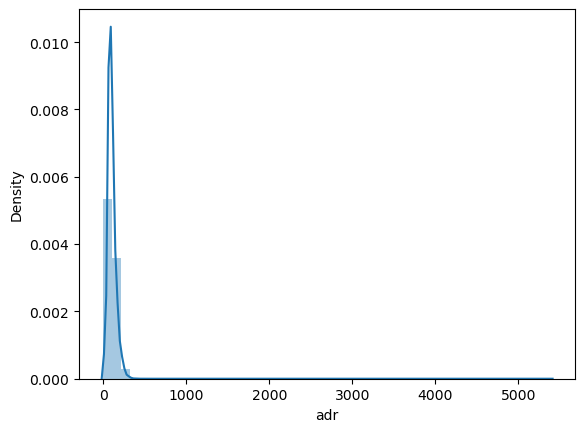

In [1630]:
sns.distplot(dataframe['adr'])

In [1631]:
dataframe[dataframe['adr']<0]

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,...,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer,total_nights
14989,0.277674,0.322277,0.374106,0.20231,0.611086,0.174868,0.391567,0.352528,0.254504,0.0,...,0,2,2,0,-6.38,0,0,0,2.0,8


In [1632]:
handle_outlier('adr')

In [1633]:
dataframe['adr'].isnull().sum()

1

<Axes: xlabel='adr', ylabel='Density'>

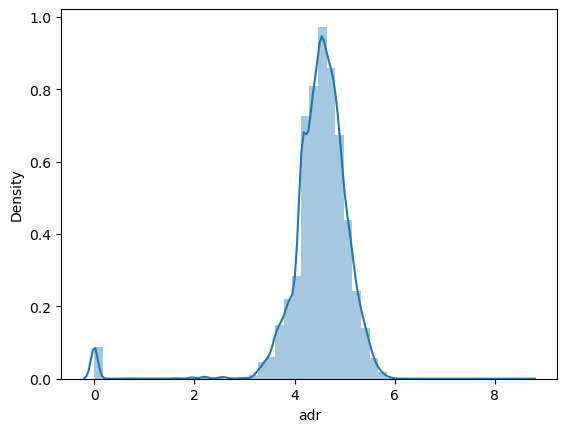

In [1634]:

sns.distplot(dataframe['adr'].dropna())

# select important features using co-relation and univariant analysis.

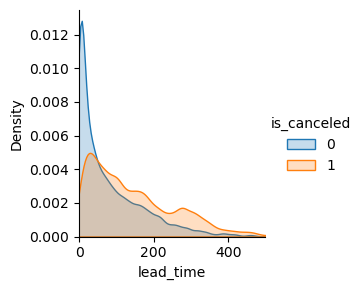

In [1635]:

sns.FacetGrid(data,hue = 'is_canceled', xlim=(0,500)).map(sns.kdeplot,'lead_time',shade = True).add_legend()

In [1636]:
corr = dataframe.corr()

In [1637]:
corr

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,...,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer,total_nights
hotel,1.000000,0.051197,0.061782,-0.040609,0.102592,0.182266,0.198171,0.280884,-0.008378,0.137082,...,-0.012261,-0.004467,-0.076598,0.072725,0.154041,-0.218961,-0.043478,-0.058094,-0.038762,-0.187816
arrival_date_month,0.051197,1.000000,-0.010208,-0.052405,0.047902,0.077075,-0.038801,0.015456,-0.029636,0.069886,...,0.008800,-0.021971,-0.011049,0.029164,0.228179,-0.021910,0.002763,0.020491,0.079090,0.046618
meal,0.061782,-0.010208,1.000000,0.022476,-0.026007,-0.025486,0.010035,0.013913,0.105767,0.050584,...,0.103606,0.011109,-0.027189,-0.031562,-0.019908,0.003455,0.006875,0.001466,-0.003447,-0.040114
country,-0.040609,-0.052405,0.022476,1.000000,0.078982,-0.129774,0.153177,0.125415,-0.029320,0.357232,...,0.093266,0.091795,-0.061513,0.067054,-0.160520,0.007613,-0.200822,-0.044139,-0.117351,-0.146467
market_segment,0.102592,0.047902,-0.026007,0.078982,1.000000,0.540116,0.182813,0.209272,-0.265606,0.267006,...,0.074710,-0.117519,-0.057578,0.096385,-0.004009,-0.145726,-0.155463,-0.104584,-0.023874,0.001091
distribution_channel,0.182266,0.077075,-0.025486,-0.129774,0.540116,1.000000,0.070381,0.118970,-0.023234,0.177167,...,-0.003868,-0.142650,-0.118461,0.048001,0.126516,-0.146562,0.075047,-0.026278,0.087776,0.079220
reserved_room_type,0.198171,-0.038801,0.010035,0.153177,0.182813,0.070381,1.000000,0.722724,-0.143390,0.072769,...,0.049290,0.022533,-0.040134,0.068336,-0.185932,-0.093401,-0.161406,-0.133748,-0.246347,-0.147017
assigned_room_type,0.280884,0.015456,0.013913,0.125415,0.209272,0.118970,0.722724,1.000000,-0.084025,0.201570,...,0.063309,-0.003205,-0.096277,0.067129,-0.038347,-0.131035,-0.135337,-0.179356,-0.229081,-0.082287
customer_type,-0.008378,-0.029636,0.105767,-0.029320,-0.265606,-0.023234,-0.143390,-0.084025,1.000000,0.136617,...,-0.021358,0.024716,-0.095486,-0.101833,0.117592,0.061786,0.137114,0.106618,0.124318,0.037025
reservation_status,0.137082,0.069886,0.050584,0.357232,0.267006,0.177167,0.072769,0.201570,0.136617,1.000000,...,0.110139,-0.057365,-0.144832,0.054301,0.081660,-0.195701,-0.234877,-0.013226,0.044826,-0.001323


In [1638]:
corr['is_canceled']


hotel                             0.137082
arrival_date_month                0.069886
meal                              0.050584
country                           0.357232
market_segment                    0.267006
distribution_channel              0.177167
reserved_room_type                0.072769
assigned_room_type                0.201570
customer_type                     0.136617
reservation_status                1.000000
reservation_status_date           0.488307
is_canceled                       1.000000
lead_time                         0.320075
arrival_date_year                 0.016622
arrival_date_week_number          0.008315
arrival_date_day_of_month        -0.005948
stays_in_weekend_nights          -0.001323
stays_in_week_nights              0.025542
is_repeated_guest                -0.083745
previous_cancellations            0.110139
previous_bookings_not_canceled   -0.057365
booking_changes                  -0.144832
days_in_waiting_list              0.054301
adr        

In [1639]:
corr['is_canceled'].sort_values(ascending = False)               

reservation_status                1.000000
is_canceled                       1.000000
reservation_status_date           0.488307
country                           0.357232
lead_time                         0.320075
market_segment                    0.267006
assigned_room_type                0.201570
distribution_channel              0.177167
hotel                             0.137082
customer_type                     0.136617
previous_cancellations            0.110139
adr                               0.081660
reserved_room_type                0.072769
arrival_date_month                0.069886
days_in_waiting_list              0.054301
meal                              0.050584
total_customer                    0.044826
stays_in_week_nights              0.025542
arrival_date_year                 0.016622
arrival_date_week_number          0.008315
stays_in_weekend_nights          -0.001323
total_nights                     -0.001323
arrival_date_day_of_month        -0.005948
is_family  

In [1640]:
corr['is_canceled'].sort_values(ascending = False).index    

Index(['reservation_status', 'is_canceled', 'reservation_status_date',
       'country', 'lead_time', 'market_segment', 'assigned_room_type',
       'distribution_channel', 'hotel', 'customer_type',
       'previous_cancellations', 'adr', 'reserved_room_type',
       'arrival_date_month', 'days_in_waiting_list', 'meal', 'total_customer',
       'stays_in_week_nights', 'arrival_date_year', 'arrival_date_week_number',
       'stays_in_weekend_nights', 'total_nights', 'arrival_date_day_of_month',
       'is_family', 'previous_bookings_not_canceled', 'is_repeated_guest',
       'booking_changes', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [1641]:
features_to_drop=['reservation_status', 'reservation_status_date','arrival_date_year', 'arrival_date_week_number',
       'stays_in_weekend_nights',  'arrival_date_day_of_month']

In [1642]:
dataframe.drop(features_to_drop,axis = 1,inplace = True)

In [1643]:
dataframe.shape

(119210, 23)

# how to find imp feature for model building

In [1644]:
dataframe.head(2)

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,is_canceled,...,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer,total_nights
0,0.277674,0.305016,0.374106,0.379365,0.36759,0.410598,0.391567,0.251373,0.254504,0,...,0,0,0,0,4.109890,0,1,0,2.0,0
1,0.277674,0.305016,0.374106,0.379365,0.36759,0.410598,0.407654,0.352528,0.254504,0,...,0,0,0,0,4.763028,1,1,1,4.0,0


In [1645]:
dataframe.isnull().sum()

hotel                             0
arrival_date_month                0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
reserved_room_type                0
assigned_room_type                0
customer_type                     0
is_canceled                       0
lead_time                         0
stays_in_week_nights              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
days_in_waiting_list              0
adr                               1
required_car_parking_spaces       0
total_of_special_requests         0
is_family                         0
total_customer                    0
total_nights                      0
dtype: int64

In [1646]:
dataframe.dropna(inplace = True)

In [1647]:
x = dataframe.drop('is_canceled' ,axis = 1)

In [1648]:
y = dataframe['is_canceled']

In [1649]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [1650]:
# lasso(alpha = 0.005) alpha is penalty feaature if alpha is lesser than feature selection is more

In [1651]:
feature_sel_model = SelectFromModel(Lasso(alpha = 0.005))

In [1652]:
feature_sel_model.fit(x,y)

SelectFromModel(estimator=Lasso(alpha=0.005))

In [1653]:
feature_sel_model.get_support()

array([False, False, False,  True,  True, False, False, False,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True])

In [1654]:
cols = x.columns

In [1655]:
cols

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'customer_type', 'lead_time', 'stays_in_week_nights',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'is_family', 'total_customer',
       'total_nights'],
      dtype='object')

In [1656]:
selected_feature = cols[feature_sel_model.get_support()]

In [1657]:
selected_feature

Index(['country', 'market_segment', 'customer_type', 'lead_time',
       'stays_in_week_nights', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'total_customer', 'total_nights'],
      dtype='object')

In [1658]:
x= x[selected_feature]

In [1659]:
x

,country,market_segment,customer_type,lead_time,stays_in_week_nights,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_customer,total_nights
0,0.379365,0.367590,0.254504,4.700480,1,0,0,0,0,4.109890,0,1,2.0,0
1,0.379365,0.367590,0.254504,4.700480,1,0,0,0,0,4.763028,1,1,4.0,0
2,0.562958,0.367590,0.407864,1.098612,1,0,0,0,0,4.499810,0,1,2.0,0
3,0.252336,0.367590,0.407864,4.488636,2,0,0,0,0,4.310262,0,2,2.0,0
4,0.562958,0.367590,0.407864,3.044522,2,0,0,0,0,4.787492,0,0,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119205,0.373537,0.153712,0.407864,5.159055,8,0,0,4,0,4.777610,0,1,3.0,6
119206,0.185848,0.367590,0.407864,2.890372,5,0,0,0,0,4.514589,0,1,2.0,4
119207,0.185848,0.343313,0.407864,4.682131,5,0,0,0,0,4.649857,0,0,2.0,4
119208,0.167193,0.367590,0.254504,5.739793,10,0,0,2,0,4.242333,0,2,2.0,4


In [1660]:
y 

0         0
1         0
2         1
3         0
4         1
         ..
119205    0
119206    0
119207    0
119208    0
119209    0
Name: is_canceled, Length: 119209, dtype: int64

# 
build a ml model            

In [1661]:
from sklearn.model_selection import train_test_split

In [1662]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.25)

In [1663]:
X_train.shape

(89406, 14)

In [1664]:
from sklearn.linear_model import LogisticRegression

In [1665]:
logreg = LogisticRegression()

In [1666]:
logreg.fit(X_train,y_train)

LogisticRegression()

In [1667]:
pred = logreg.predict(X_test)

In [1668]:
pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [1669]:
from sklearn.metrics import confusion_matrix 


In [1670]:

confusion_matrix(y_test,pred)

array([[16674,  1968],
       [ 3889,  7272]], dtype=int64)

In [1671]:
from sklearn.metrics import accuracy_score

In [1672]:
accuracy_score(y_test, pred)

0.803476160118109

# how to cross_validatemodel

In [1673]:
from sklearn.model_selection import cross_val_score

In [1674]:
score = cross_val_score(logreg,x,y,cv = 10)

In [1675]:
score

array([0.79431256, 0.79573861, 0.79867461, 0.82358863, 0.81805218,
       0.73945139, 0.76008724, 0.85160641, 0.84263065, 0.80746644])

In [1676]:
score.mean()

0.8031608712896817

# apply multiple algo on data and check the accuracy

In [1677]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [1678]:
models = []
models.append(('LogisticRegression', LogisticRegression()))
models.append(('Naive Bayes', GaussianNB()))
models.append(('raindomForest', RandomForestClassifier()))
models.append(('decisionTree', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
            


In [1679]:
from sklearn.metrics import confusion_matrix, accuracy_score

for name, model in models:
    print(name)
    model.fit(X_train, y_train)
    
    predictions = model.predict(X_test)
    
    print(confusion_matrix(predictions, y_test))
    print('\n')
    
    print(accuracy_score(predictions, y_test))
    print('\n')

LogisticRegression
[[16674  3889]
 [ 1968  7272]]


0.803476160118109


Naive Bayes
[[ 4199   313]
 [14443 10848]]


0.5048820588531356


raindomForest
[[17127  2413]
 [ 1515  8748]]


0.8682011877998859


decisionTree
[[16069  2475]
 [ 2573  8686]]


0.8306210784149247


KNN
[[16469  3250]
 [ 2173  7911]]


0.8180384525047814


